# Scattering by a Hard Sphere

## Part A

Import special libraries.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn, spherical_yn, legendre

Define $\delta_l$

In [19]:

def delta_l(kR, l):
    return np.arctan(spherical_jn(n=l, z=kR)/spherical_yn(n=l, z=kR))

Define $\sigma/R^2$ and $k^2 \sigma$

In [34]:
def cross_tot_R2(kR, order=100):
    return 4*np.pi/(kR**2) * np.sum([(2*l+1)*np.sin(delta_l(kR, l))**2 for l in range(order)], axis=0)

def cross_tot_k2(kR, order=100):
    return 4*np.pi * np.sum([(2*l+1)*np.sin(delta_l(kR, l))**2 for l in range(order)], axis=0)

Get values

In [35]:
kRs = np.linspace(1,100,100)
cross_div_R2 = cross_tot_R2(kRs)
cross_times_k2 = cross_tot_k2(kRs)

Plot.

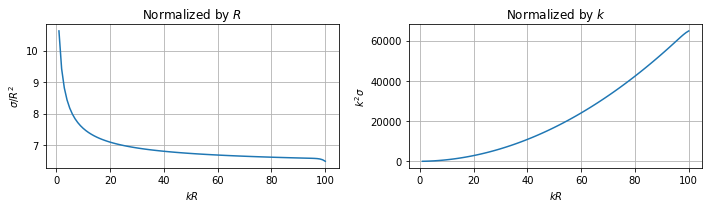

In [48]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(kRs, cross_div_R2)
ax[1].plot(kRs, cross_times_k2)
ax[0].set_ylabel('$\sigma/R^2$')
ax[0].set_xlabel('$kR$')
ax[1].set_ylabel('$k^2 \sigma$')
ax[1].set_xlabel('$kR$')
ax[0].set_title('Normalized by $R$')
ax[1].set_title('Normalized by $k$')

[a.grid() for a in ax]

fig.tight_layout()

* The **left plot** shows that if we hold $R$ constant and increase $k$, the total cross section decreases. This implies that a smaller percentage of the incident wave is being scattered: since the wave has higher energy, this is expected.

* The **right plot** shows that if we hold $k$ constant and increase $R$, the total cross section increases. The larger solid sphere in the center causes more of the wave to be scattered 

## Part B

In [52]:
def legendre_polynomial(x, l):
    return legendre(l)(x)

In [96]:
def d_sig_d_theta(theta, kR, order=80):
    return np.abs(np.sum([(2*l+1)\
                   *np.exp(1j*delta_l(kR, l))\
                   *np.sin(delta_l(kR, l))\
                   *legendre(l)(np.cos(theta))\
                   for l in range(order)], axis=0))**2

In [101]:
thetas = np.linspace(0, np.pi, 20)
dsdt_1 = d_sig_d_theta(thetas, 0.1)
dsdt_2 = d_sig_d_theta(thetas, 10)

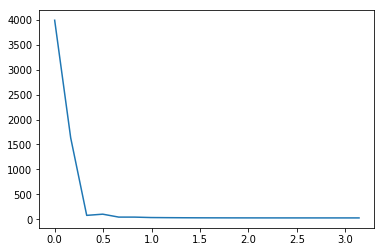

In [102]:
plt.plot(thetas, dsdt_2)